# Sea Level Rise

SOURCES:
- NOAA Technical Report (2022): "Global and Regional Sea Level Rise Scenarios for the United States"
- IPCC AR6 (2021): Chapter on Sea Level Change

DATA:
- Church, J. A. and N.J. White (2011), Sea-level rise from the late 19th to the early 21st Century. Surveys in Geophysics, doi:10.1007/s10712-011-9119-1
- https://datahub.io/core/sea-level-rise

Color zones:
- Green: 0-200mm (Manageable - historical range)
- Yellow: 200-500mm (Caution - low emissions scenario)
- Orange: 500-1000mm (Warning - moderate emissions)
- Red: over 1000mm (Danger - high emissions, catastrophic)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['font.family'] = ['LCD']

# Load sea level data
sea_level = pd.read_csv('data/CSIRO_Recons_gmsl_mo_2015.csv')
sea_level['date'] = pd.to_datetime(sea_level['Time'])
sea_level['year'] = sea_level['date'].dt.year
sea_level['month'] = sea_level['date'].dt.month
sea_level = sea_level.rename(columns={'GMSL': 'sea_level_mm'})

# Get current sea level rise (in mm above baseline)
current_sea_level = sea_level['sea_level_mm'].iloc[-1]
baseline_sea_level = sea_level['sea_level_mm'].iloc[0]
current_rise = current_sea_level - baseline_sea_level
# in m
current_rise_m = current_rise / 1000

# Get dates
start_year = int(sea_level['year'].iloc[0]) if 'year' in sea_level.columns else 1880
current_year = int(sea_level['year'].iloc[-1]) if 'year' in sea_level.columns else datetime.now().year

# Calculate rate (recent)
recent_data = sea_level[sea_level['year'] >= 2006] if 'year' in sea_level.columns else sea_level[-20:]
years_span = recent_data['year'].iloc[-1] - recent_data['year'].iloc[0]
level_change = recent_data['sea_level_mm'].iloc[-1] - recent_data['sea_level_mm'].iloc[0]
current_rate = level_change / years_span if years_span > 0 else 3.6

# Projection to 2100 (if we maintain current rate)
years_to_2100 = 2100 - current_year
projected_rise_2100 = current_rise + (current_rate * years_to_2100)
  
print(f"Sea level rise since {start_year}: {current_rise:.1f} mm")
print(f"Current rate: {current_rate:.2f} mm/year")
print(f"Data as of: {current_year}")
print(f"Current rise: {current_rise:.0f}mm / {current_rise_m:.2f}m")
print(f"Rate: {current_rate:.2f}mm/year")
print(f"Projected 2100 (current rate): ~{projected_rise_2100:.0f}mm")

Sea level rise since 1880: 241.5 mm
Current rate: 3.33 mm/year
Data as of: 2013
Current rise: 242mm (0.24m / 0.8ft)
Rate: 3.33mm/year
Projected 2100 (current rate): ~531mm


C:\Users\linas\AppData\Local\Temp\ipykernel_44596\1376122209.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sea_level['date'] = pd.to_datetime(sea_level['Time'])


In [64]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232',
          'gray': '#666666',
          'white': '#cccccc',
          'black': '#000000'
          }

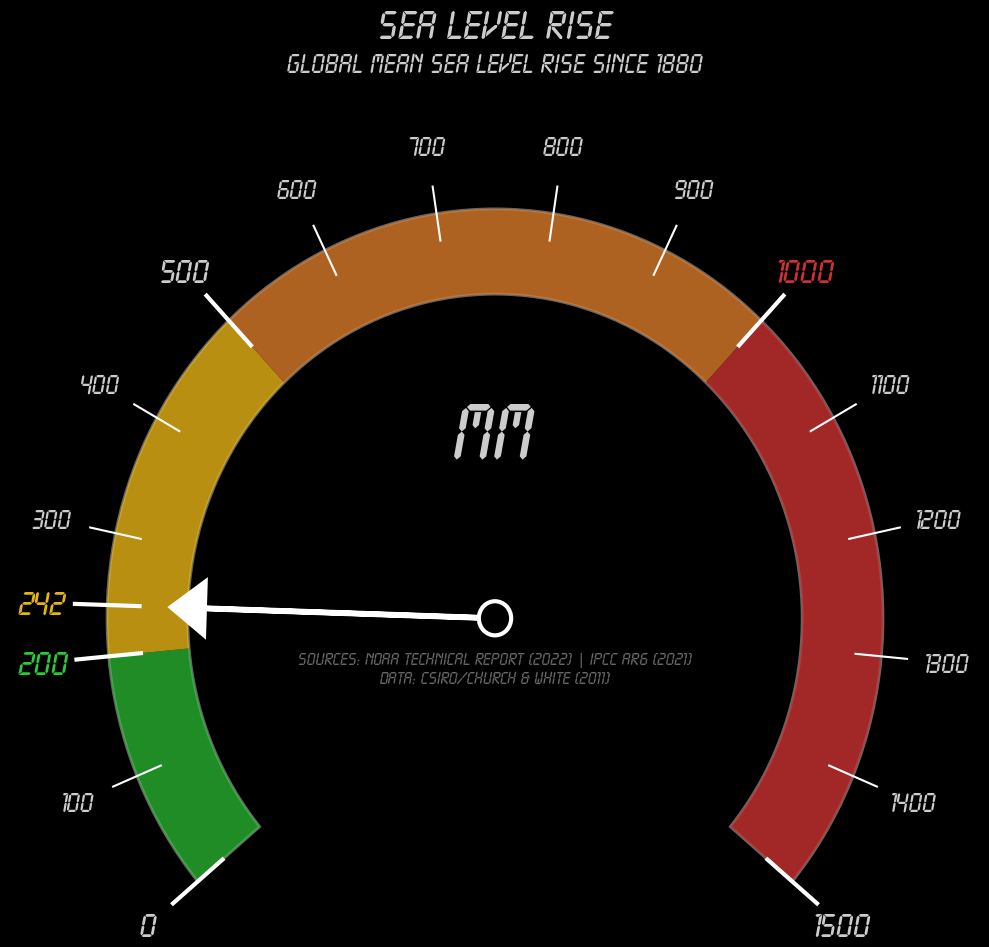

In [ ]:
fig, ax = plt.subplots(figsize=(10, 9.5), facecolor=colors['black'])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.9, 1.5)
ax.axis('off')
ax.set_facecolor(colors['black'])

# Circle span
theta_start = -40  # Bottom right
theta_end = 220     # Bottom left

# Scale: 0 mm to 1500 mm
sl_min = 0
sl_max = 1500
sl_range = sl_max - sl_min

# Calculate angles for each zone
def sealevel_to_angle(sl_value):
    """Convert sea level rise (mm) to angle on gauge"""
    pct = (sl_value - sl_min) / sl_range
    return theta_end + pct * (theta_start - theta_end)

angle_200 = sealevel_to_angle(200)   # Manageable
angle_500 = sealevel_to_angle(500)   # Caution
angle_1000 = sealevel_to_angle(1000) # Warning

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor=colors['black'], edgecolor=colors['gray'], linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 0-200mm
safe_arc = Wedge((0, 0), 1.2, angle_200, theta_end, width=0.25,
                 facecolor=colors['green'], edgecolor='none', alpha=0.7)
ax.add_patch(safe_arc)

# Yellow zone: 200-500mm
caution_arc = Wedge((0, 0), 1.2, angle_500, angle_200, width=0.25,
                    facecolor=colors['yellow'], edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 500-1000mm
warning_arc = Wedge((0, 0), 1.2, angle_1000, angle_500, width=0.25,
                    facecolor=colors['orange'], edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 1000-2000mm
danger_arc = Wedge((0, 0), 1.2, theta_start, angle_1000, width=0.25,
                   facecolor=colors['red'], edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
major_ticks = [0, 200, 500, 1000, 1500]
tick_values = np.linspace(0, 1500, 16)
for sl_val in tick_values:
        sl_val = int(sl_val)
        angle = sealevel_to_angle(sl_val)
        angle_rad = np.radians(angle)
        
        # Label
        x_label = 1.4 * np.cos(angle_rad)
        y_label = 1.4 * np.sin(angle_rad)
        label_text = f'{sl_val}'
        label_color = colors['white']
        label_weight = 'normal'
        
        # Decide if major or minor tick
        if sl_val in major_ticks:
                tick_outer = 1.3
                tick_inner = 1.1
                tick_lw = 3
                label_size = 25
        else:
                tick_outer = 1.28
                tick_inner = 1.12
                tick_lw = 1.5
                label_size = 20

        if sl_val == 200: 
                label_color = colors['green']
                label_weight = 'bold'
        elif sl_val == 1000:
                label_color = colors['red']
                label_weight = 'bold'

        ax.text(
                x_label, y_label, label_text,
                ha='center', va='center',
                fontsize=label_size,
                color=label_color,
                fontweight=label_weight
        )
    
        # Outer tick mark
        x_outer = tick_outer * np.cos(angle_rad)
        y_outer = tick_outer * np.sin(angle_rad)
        x_inner = tick_inner * np.cos(angle_rad)
        y_inner = tick_inner * np.sin(angle_rad)
        
        ax.plot([x_inner, x_outer], [y_inner, y_outer], 
                color='white', linewidth=tick_lw)
    
# Needle pointing to current sea level rise
needle_angle = sealevel_to_angle(current_rise)
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='white', ec='white', linewidth=4, zorder=2)

# Current sea level rise 
x_outer = 1.3 * np.cos(needle_rad)
y_outer = 1.3 * np.sin(needle_rad)
x_inner = 1.1 * np.cos(needle_rad)
y_inner = 1.1 * np.sin(needle_rad)
x_label = 1.4 * np.cos(needle_rad)
y_label = 1.4 * np.sin(needle_rad)
ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=tick_lw
    )
ax.text(
        x_label, y_label, f'{current_rise:.0f}',
        ha='center', va='center',
        fontsize=25,
        color=colors['yellow'],
        fontweight='bold'
    )

# Center hub
center = Circle((0, 0), 0.05, facecolor=colors['black'], 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Unit
ax.text(0, 0.55, 'MM', fontsize=60, fontweight='bold',
        color=colors['white'], ha='center', va='center', zorder=1)

# Title
ax.text(0, 1.7, 'SEA LEVEL RISE', fontsize=30,
        fontweight='bold', color=colors['white'], ha='center', va='bottom')
ax.text(0, 1.6, f'Global Mean Sea Level Rise Since {start_year}', fontsize=20,
        color=colors['white'], ha='center', va='bottom', style='italic')
  
# Sources
sources_text = '''Sources: NOAA Technical Report (2022) | IPCC AR6 (2021)
Data: CSIRO/Church & White (2011)'''
ax.text(0, -0.1, sources_text, fontsize=13, color=colors['gray'],
        ha='center', va='top', multialignment='center')

plt.tight_layout()
plt.savefig('visualizations/sea_level.svg',
            bbox_inches='tight', facecolor=colors['black'], edgecolor='none')
plt.show()